In this Notebook, I will focus on Standard Deviation and Standard Score in Statistics.

The Dataset using in this Notebook is the <a href=https://www.kaggle.com/c/home-data-for-ml-course/data>Housing Prices</a>, which is a very basic dataset.

In [54]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

# Force Pandas to show all the columns
pd.set_option('display.max_columns', None)

# Import Datasets
df = pd.read_csv('./datasets/train.csv', index_col='Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Let now analyze the most important Attribute in this Dataset: `SalePrice`

In [5]:
# Take a look at how our SalePrice looks like
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Observations:**
- `SalePrice` is a Numerical Attribute, vary from `34900` to `755000` which is very good for our purpose.
- We can easily obtain the Standard Deviation of `SalePrice` using 
```python 
df['SalePrice'].std() 
```
But as we are practising, we instead calculate it manually using formula and the help of `Numpy`.
- The `mean` is roughly `181000` and the `median` is `163000`, theoretically, our Data is **negatively skewed**.

## Calculate the Standard Deviation of Sale Price using Formula
The formula for calculating Standard Deviation $\sigma$ is
$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N{(x_i - \mu)}^2}
$$
Or we can use an easier-for-calculating formula
$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N{x_i}^2 - \mu^2}
$$

In [24]:
sale_price_std = math.sqrt(1/df['SalePrice'].shape[0] * np.sum(df['SalePrice']**2) - (np.sum(df['SalePrice'])/df['SalePrice'].shape[0])**2)

round(sale_price_std, 2)

79415.29

According to our calculation, the Standard Deviation for `SalePrice` is roughly `79415.29`, but it's `79442.5` according to `Pandas`, why is it?

How about using the first formula?

In [33]:
math.sqrt(1/df['SalePrice'].shape[0] * (np.sum((df['SalePrice'] - df['SalePrice'].mean())**2)))

79415.29188606751

It's no different here, the `std` still remains the same as we used to calculate. So instead of using the `Pandas std`, we will use our `std`.

## Z-scores
- Z-scores transform distribution of data into a new, general, theoretical distribution with `mean 0` and `std` of `1`.
- As what I've learn, Z-scores are mainly used to **compare different sets of data** whose distributions are different from each other (distribution is `mean` and `std` in general).
- One other use of z-scores as I know before is **standardizing features** for ML training purpose.
- The formula for calculating Z-scores is:
$$
z = \frac{x - \mu}{\sigma}
$$
With $x$ is a particular value.

In [38]:
# As an example, let's calculate the z-score for the 27th entry of our dataset
z_score_example = (df['SalePrice'][26] - df['SalePrice'].mean()) / sale_price_std

print(round(z_score_example, 2))

0.95


**Observations:**
- Z-score of the 27th entry of our dataset is `0.95`, then we can tell that it is roughly equal to `std` of the whole dataset: if we print its value, it will around $\mu \pm \sigma$, `100000` or `260000`.

In [40]:
df['SalePrice'][26]

256300

Yes, I'm right, indeed (`256300` is around `260000`).

Finally, to get a better understand of our `SalePrice`, let's visualize it using **Histogram**

## Visualization

<AxesSubplot:ylabel='Frequency'>

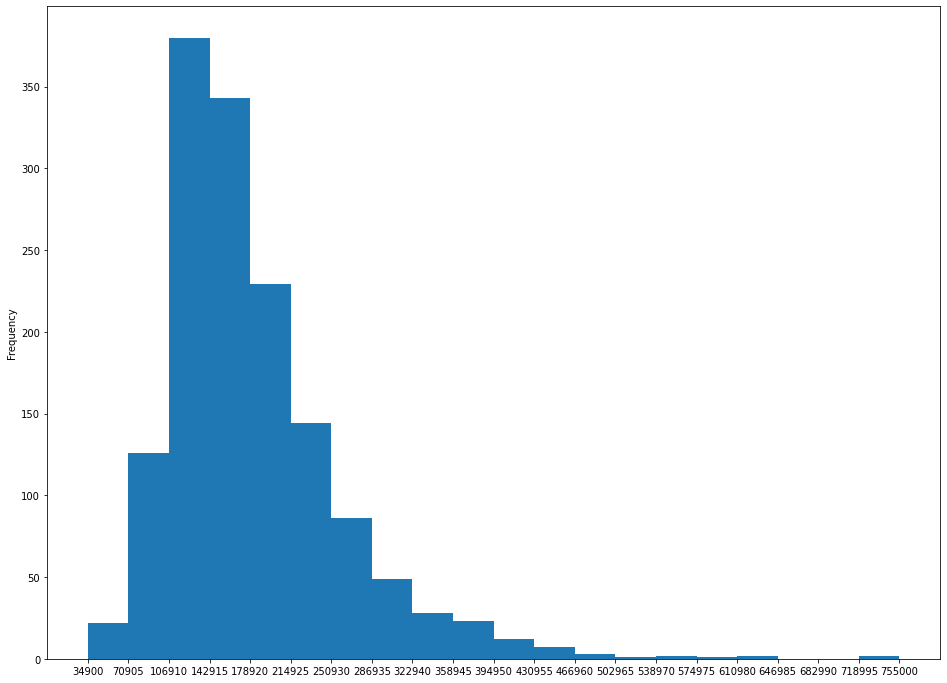

In [66]:
_, hist_ticks = np.histogram(df['SalePrice'], bins=20)

fig = plt.figure(figsize=(16, 12))
df['SalePrice'].plot(kind='hist', bins=20, xticks=hist_ticks)

**Observations:**
- I was wrong for saying that the Data is skewed to the left, it is inded positive skewed. What a shame.
- Most of the Data is between `106910` and `178920`, which is smaller than `mean`.
- There are some Outliers in our Data, some of them are very extreme.